# OND SST Anomaly Calculation and Plotting

In [1]:
import numpy as np
import xarray as xr   #----xarray is an important library to handle and manage netCDF file format
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
from netCDF4 import Dataset 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
# --- read netcdf file using xarray
ds= xr.open_dataset('sst.mnmean (2).nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2031, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2023-04-04

In [3]:
# --- Define 'lons','lats' variables
lons = ds['lon'][:]  
lats = ds['lat'][:] 

# --- select Sep Oct Nov months
sstOND = ds['sst'].sel(time=np.in1d(ds['time.month'], [10, 11, 12]))
sstOND

<xarray.DataArray 'sst' (time: 507, lat: 89, lon: 180)>
[8122140 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-10-01 1854-11-01 ... 2022-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [4]:
#select year range 1981-2020
s = sstOND.sel(time=slice('1981-10-01', '2020-12-01'))
s

<xarray.DataArray 'sst' (time: 120, lat: 89, lon: 180)>
[1922400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1981-10-01 1981-11-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [5]:
#Make numpy array of Oct Nov and Dec months for 1981-2020
octo=s.sel(time=np.in1d(s['time.month'], [10]))
OCT=octo.to_numpy()

nov=s.sel(time=np.in1d(s['time.month'], [11]))
NOV=nov.to_numpy()

dec=s.sel(time=np.in1d(s['time.month'], [12]))
DEC=dec.to_numpy()

#Average of OND
OND=(OCT+NOV+DEC)/3
print(OND.shape)

(40, 89, 180)


In [6]:
# Calculate the climatology
sst_clim= np.mean(OND,axis=0)
print(sst_clim.shape)

(89, 180)


In [7]:
#Calculate the anomaly i.e. value-climatology
ano=OND-sst_clim
print(ano.shape)

(40, 89, 180)


Now you have the anomaly value for each of the 40 years (from 1981 to 2020) in the 3-Dimensional numpy array.
You can select and plot whichever year you need.

In [8]:
# Remember the indxing in Numpy array starts from 0
ano_1987 =ano[(6), :, :]
ano_1993 =ano[(12), :, :]
ano_2005 =ano[(24), :, :]
ano_2010 =ano[(29), :, :]
ano_2015 =ano[(36), :, :]

Below you can see the 1987 OND SST anomaly Plot
Similarly you can plot for the other years too.

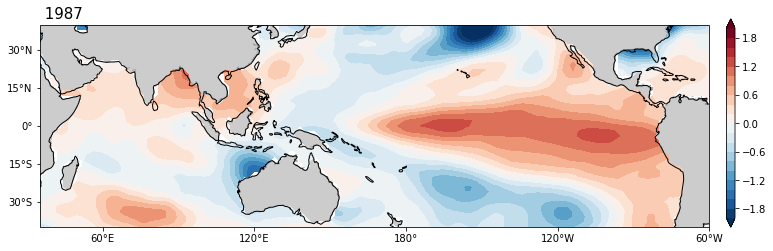

In [9]:
fig = plt.figure(figsize=[12,5])
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
data_crs = ccrs.PlateCarree()
clevs = [-2,-1.8,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]
ax1.set_title(' 1987',fontsize=15,loc='left')
cf1 =ax1.contourf(lons, lats,ano_1987,clevs,transform=data_crs,  cmap='RdBu_r',extend='both')
ax1.coastlines()
# Need longitude extent from -60 to +60 on PlateCarree(central_longitude=180)
minlon = -145 + 180
maxlon = +120 + 180
ax1.set_extent([minlon, maxlon, -40, 40], ccrs.PlateCarree())
ax1.set_xticks([60, 120, 180, 240, 300], crs=ccrs.PlateCarree())
ax1.set_yticks([ -30, -15, 0, 15,30], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
cbar_ax = fig.add_axes([0.92, 0.22, 0.0099, 0.58])
cbar=fig.colorbar(cf1, cax=cbar_ax,orientation='vertical')
ax1.add_feature(cf.LAND.with_scale('10m'), facecolor='grey',alpha=0.4)
plt.show()